Building a simple feedforward artifical neural network to analyse a car dataset.
The target parameter is mpg, based upon weight, displacement, acceleration and horsepower.

The sklearn library is used to implement this model.

In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv('Car_Data.csv')
data.head()

,mpg,displacement,horsepower,weight,acceleration,model,origin,name
0,18.0,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,302.0,140,3449,10.5,70,1,ford torino


checking for any missing values in the dataset...

In [3]:
data.isnull().sum()

mpg             0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
name            0
dtype: int64

Checking the datatypes are what we expect....

In [4]:
data.dtypes

mpg             float64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
name             object
dtype: object

The horsepower parameter seems to be an object rather than an integer which is what we would expect. If we look at all the unique values in the dataset, we can see if there are any odd entries. This works on this dataset as it is relatively small, but for a larger dataset we could set a condition to look for any entry which wasnt a certain datatype or number, or within a certain range.

In [5]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We have a invalid character '?' in the horsepower column, so we should remove this.
We keep all the data points which are not equal to the '?' character, and then convert this datatype to integer.

In [6]:
data= data[data['horsepower']!='?']

In [7]:
data=data.astype({'horsepower': int})

Sometimes outliers can have an impact on the accuracy of our model. We can determine the extent to which our dataset contains outliers by plotting boxplots, which show quartiles in the data, along with outliers which are displayed outside of the boxplot whiskers as single points.

In [8]:
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
sns.boxplot(data=data[['mpg']], ax=axs[0])
sns.boxplot(data=data[['weight']], ax=axs[1])
sns.boxplot(data=data[['displacement']], ax=axs[2])
sns.boxplot(data=data[['horsepower']], ax=axs[3])
sns.boxplot(data=data[['acceleration']], ax=axs[4])    

Looks like we have a few outliers in the horsepower and acceleration dataset, however these are not considerability outside the range of the data.
Dropping outliers should only really be done if we can be sure that the measurement was performed in error, which we cannot be sure of here.

We can look at using an activation function or metric which are less sensitive to outliers if the outliers later influence the model.

Next, we can look at the distribution of the data, to obtain further insight into our variables, and determine if they possess a gaussian distribution.

In [9]:
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
sns.histplot(data=data[['mpg']], ax=axs[0])
sns.histplot(data=data[['weight']], ax=axs[1])
sns.histplot(data=data[['displacement']], ax=axs[2])
sns.histplot(data=data[['horsepower']], ax=axs[3])
sns.histplot(data=data[['acceleration']], ax=axs[4])    

Time to build the model....

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

We set our target to be mpg, and our inputs to be weight, displacement, horsepower and acceleration.

In [11]:
x=data[['weight','displacement','horsepower','acceleration']]
y=data['mpg']

i=15
np.random.seed(i)

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=i)

We are going to scale our data using the MinMaxScaler, as from the histogram plots we can see that the data is not normally distributed.

In [12]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
mlp=MLPRegressor(activation='relu', max_iter=1000, hidden_layer_sizes=(100, 100, 100), 
                 learning_rate_init=0.001, random_state=i, shuffle=True,  solver='adam',
                nesterovs_momentum=True, verbose=True)


Setting verbose to True allows us to see the loss throughout the training process.
We need to ensure that the loss is decreasing with each iteration, and reaches a point of stability.

By monitoring the loss, we can avoid underfitting. An underfit model can be identified by loss which is not decreasing, or very high values. Loss may also continue to decrease at the end of the plot, which shows we need more training iterations.

Overfitting may be identified by looking at both the loss in training and validation, and is seen when validation loss decreases to a point but starts to increase, and training loss continues to decrease.

If validation loss is lower than training, the validation data may be easier for the model to predict than the training. 

If our training loss decreases to a point of stability but the validation loss is inconclusive, the validation dataset might not hold enough datasamples to determine the model abilities.

In [14]:
history= mlp.fit(x_train_scaled,y_train)


Iteration 1, loss = 311.54981668
Iteration 2, loss = 307.01780571
Iteration 3, loss = 302.46144527
Iteration 4, loss = 297.85546455
Iteration 5, loss = 293.28071453
Iteration 6, loss = 288.27675004
Iteration 7, loss = 282.82207017
Iteration 8, loss = 276.74245345
Iteration 9, loss = 270.10331015
Iteration 10, loss = 262.63599930
Iteration 11, loss = 254.25513678
Iteration 12, loss = 244.80169307
Iteration 13, loss = 234.15086535
Iteration 14, loss = 222.42012871
Iteration 15, loss = 209.26770160
Iteration 16, loss = 195.06678896
Iteration 17, loss = 179.69119640
Iteration 18, loss = 163.44981157
Iteration 19, loss = 146.28859272
Iteration 20, loss = 128.83787515
Iteration 21, loss = 111.55037282
Iteration 22, loss = 94.69807737
Iteration 23, loss = 80.11823615
Iteration 24, loss = 68.35373066
Iteration 25, loss = 60.02693990
Iteration 26, loss = 55.48225115
Iteration 27, loss = 54.08751062
Iteration 28, loss = 54.32123817
Iteration 29, loss = 54.31411405
Iteration 30, loss = 53.1702067

Iteration 261, loss = 6.54273618
Iteration 262, loss = 6.54431613
Iteration 263, loss = 6.54548653
Iteration 264, loss = 6.53813163
Iteration 265, loss = 6.53808466
Iteration 266, loss = 6.53058887
Iteration 267, loss = 6.53054936
Iteration 268, loss = 6.55444422
Iteration 269, loss = 6.54470962
Iteration 270, loss = 6.52044072
Iteration 271, loss = 6.52042925
Iteration 272, loss = 6.52509638
Iteration 273, loss = 6.52965543
Iteration 274, loss = 6.51801787
Iteration 275, loss = 6.51554729
Iteration 276, loss = 6.51851612
Iteration 277, loss = 6.53134597
Iteration 278, loss = 6.51846118
Iteration 279, loss = 6.53110320
Iteration 280, loss = 6.53067115
Iteration 281, loss = 6.49890190
Iteration 282, loss = 6.51231511
Iteration 283, loss = 6.51720731
Iteration 284, loss = 6.51935637
Iteration 285, loss = 6.48799625
Iteration 286, loss = 6.49117198
Iteration 287, loss = 6.48680730
Iteration 288, loss = 6.49567742
Iteration 289, loss = 6.48862866
Iteration 290, loss = 6.47994703
Iteration 

Iteration 524, loss = 6.03554808
Iteration 525, loss = 6.01340186
Iteration 526, loss = 6.06402399
Iteration 527, loss = 6.03291070
Iteration 528, loss = 6.01630593
Iteration 529, loss = 6.03901393
Iteration 530, loss = 6.02921799
Iteration 531, loss = 6.00620517
Iteration 532, loss = 6.00520674
Iteration 533, loss = 6.02858912
Iteration 534, loss = 6.01249653
Iteration 535, loss = 6.01441804
Iteration 536, loss = 6.00404837
Iteration 537, loss = 5.99453446
Iteration 538, loss = 5.99130504
Iteration 539, loss = 6.00099140
Iteration 540, loss = 6.00191042
Iteration 541, loss = 6.00265980
Iteration 542, loss = 5.99436169
Iteration 543, loss = 5.98088614
Iteration 544, loss = 5.97916528
Iteration 545, loss = 5.99262108
Iteration 546, loss = 5.98927467
Iteration 547, loss = 5.97750510
Iteration 548, loss = 5.97645545
Iteration 549, loss = 5.98208892
Iteration 550, loss = 5.97252328
Iteration 551, loss = 5.96861856
Iteration 552, loss = 5.97060028
Iteration 553, loss = 5.95880115
Iteration 

As we can see from the training log, the training loss reached a point of stability. This can also be easily shown on a plot of training loss vs iterations.

Text(0, 0.5, 'loss')

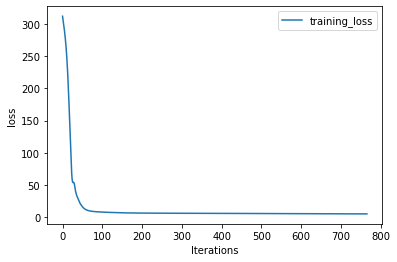

In [15]:
%matplotlib inline
historydf=pd.DataFrame(mlp.loss_curve_, columns=['training_loss'])
sns.lineplot(data=historydf)
plt.xlabel("Iterations")
plt.ylabel("loss")

We can make predictions on the test dataset using our new model.

In [16]:
predictions=mlp.predict(x_test_scaled)

Mean absolute error is more robust to outliers than mean squared error, therefore we use this metric alongside the R squared for the model.

The validation loss curve is also plotted, to ensure we dont have any overfitting of the model. 

In [17]:
mlp.fit(x_test_scaled,y_test)
history_val_df=pd.DataFrame(mlp.loss_curve_, columns=['validation_loss'])

Iteration 1, loss = 302.95236547
Iteration 2, loss = 300.71743303
Iteration 3, loss = 298.50995135
Iteration 4, loss = 296.27454323
Iteration 5, loss = 294.04496008
Iteration 6, loss = 291.78542510
Iteration 7, loss = 289.51213931
Iteration 8, loss = 287.27584066
Iteration 9, loss = 285.01810219
Iteration 10, loss = 282.67455510
Iteration 11, loss = 280.21153744
Iteration 12, loss = 277.60762062
Iteration 13, loss = 274.87826046
Iteration 14, loss = 272.02860047
Iteration 15, loss = 269.04136459
Iteration 16, loss = 265.89643365
Iteration 17, loss = 262.59846939
Iteration 18, loss = 259.12400905
Iteration 19, loss = 255.44274475
Iteration 20, loss = 251.54072011
Iteration 21, loss = 247.39300409
Iteration 22, loss = 242.98826722
Iteration 23, loss = 238.31796291
Iteration 24, loss = 233.39022655
Iteration 25, loss = 228.17979886
Iteration 26, loss = 222.67567150
Iteration 27, loss = 216.87444918
Iteration 28, loss = 210.77249793
Iteration 29, loss = 204.36811159
Iteration 30, loss = 19

Iteration 264, loss = 10.87961061
Iteration 265, loss = 10.86618309
Iteration 266, loss = 10.85292309
Iteration 267, loss = 10.83958586
Iteration 268, loss = 10.82630507
Iteration 269, loss = 10.81304253
Iteration 270, loss = 10.80014226
Iteration 271, loss = 10.78741875
Iteration 272, loss = 10.77487929
Iteration 273, loss = 10.76210605
Iteration 274, loss = 10.74993578
Iteration 275, loss = 10.73769427
Iteration 276, loss = 10.72540774
Iteration 277, loss = 10.71339533
Iteration 278, loss = 10.70143751
Iteration 279, loss = 10.68947899
Iteration 280, loss = 10.67765761
Iteration 281, loss = 10.66603813
Iteration 282, loss = 10.65442650
Iteration 283, loss = 10.64309636
Iteration 284, loss = 10.63179320
Iteration 285, loss = 10.62047565
Iteration 286, loss = 10.60915145
Iteration 287, loss = 10.59825456
Iteration 288, loss = 10.58730510
Iteration 289, loss = 10.57617941
Iteration 290, loss = 10.56504039
Iteration 291, loss = 10.55429499
Iteration 292, loss = 10.54366940
Iteration 293,

Iteration 548, loss = 8.97353772
Iteration 549, loss = 8.96682344
Iteration 550, loss = 8.96271239
Iteration 551, loss = 8.95597065
Iteration 552, loss = 8.95271456
Iteration 553, loss = 8.94584795
Iteration 554, loss = 8.94037745
Iteration 555, loss = 8.93408648
Iteration 556, loss = 8.92887284
Iteration 557, loss = 8.92345089
Iteration 558, loss = 8.91696551
Iteration 559, loss = 8.91243985
Iteration 560, loss = 8.90584049
Iteration 561, loss = 8.90069663
Iteration 562, loss = 8.89500683
Iteration 563, loss = 8.88775366
Iteration 564, loss = 8.88183949
Iteration 565, loss = 8.87704064
Iteration 566, loss = 8.87058824
Iteration 567, loss = 8.86381895
Iteration 568, loss = 8.85768292
Iteration 569, loss = 8.85161996
Iteration 570, loss = 8.84500466
Iteration 571, loss = 8.84036850
Iteration 572, loss = 8.83325354
Iteration 573, loss = 8.82782718
Iteration 574, loss = 8.82003853
Iteration 575, loss = 8.81501479
Iteration 576, loss = 8.80753658
Iteration 577, loss = 8.80201451
Iteration 

Iteration 826, loss = 7.55023333
Iteration 827, loss = 7.54866483
Iteration 828, loss = 7.54589010
Iteration 829, loss = 7.54356996
Iteration 830, loss = 7.54100593
Iteration 831, loss = 7.53944098
Iteration 832, loss = 7.53589642
Iteration 833, loss = 7.53375181
Iteration 834, loss = 7.53260049
Iteration 835, loss = 7.52982401
Iteration 836, loss = 7.52509713
Iteration 837, loss = 7.52481374
Iteration 838, loss = 7.52261018
Iteration 839, loss = 7.52113309
Iteration 840, loss = 7.51647631
Iteration 841, loss = 7.51705842
Iteration 842, loss = 7.51177082
Iteration 843, loss = 7.50956376
Iteration 844, loss = 7.50836345
Iteration 845, loss = 7.50557782
Iteration 846, loss = 7.50241140
Iteration 847, loss = 7.50374389
Iteration 848, loss = 7.49859845
Iteration 849, loss = 7.49595917
Iteration 850, loss = 7.49750512
Iteration 851, loss = 7.49211054
Iteration 852, loss = 7.48973118
Iteration 853, loss = 7.48585035
Iteration 854, loss = 7.48536355
Iteration 855, loss = 7.48334668
Iteration 

C:\Users\Victoria\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R2 0.711720160854727
MAE 3.20723026551739


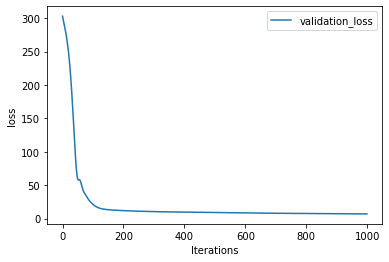

In [18]:
sns.lineplot(data=history_val_df)
plt.xlabel("Iterations")
plt.ylabel("loss")

RTWO2=sklearn.metrics.r2_score(y_test,predictions)
print('R2',RTWO2)
print('MAE',sklearn.metrics.mean_absolute_error(y_test,predictions))

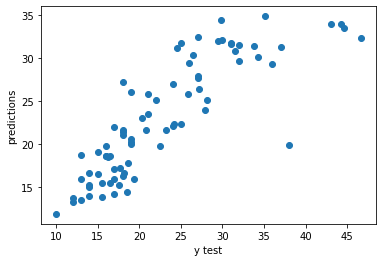

In [19]:
plt.scatter(y_test, predictions)
plt.xlabel('y test')
plt.ylabel('predictions')
plt.show()

We can view the predictions next to the expected output to determine % error and accuracy, as well allowing us to get a feel for the predictions made.

In [20]:
predictions_df=pd.DataFrame(data=predictions, columns=['predictions'])
y_test_df=y_test.to_frame()
y_test_df=y_test_df.rename(columns = {'mpg':'expected'})

results=pd.merge(predictions_df, y_test_df, left_index=True, right_index=True)
results.head(20)

,predictions,expected
2,34.432345,18.0
6,29.643032,14.0
13,22.070400,14.0
18,27.660031,27.0
21,29.416774,24.0
24,31.343727,21.0
25,21.663664,10.0
34,17.232316,16.0
36,19.750106,19.0
45,26.351030,18.0


In [21]:
results['error %']=(abs(results['predictions']-results['expected'])/results['predictions'])*100

In [22]:
results.head(20)

,predictions,expected,error %
2,34.432345,18.0,47.723573
6,29.643032,14.0,52.771363
13,22.070400,14.0,36.566623
18,27.660031,27.0,2.386228
21,29.416774,24.0,18.413895
24,31.343727,21.0,33.000949
25,21.663664,10.0,53.839758
34,17.232316,16.0,7.151194
36,19.750106,19.0,3.797983
45,26.351030,18.0,31.691474


In [23]:
results.describe()

,predictions,expected,error %
count,16.000000,16.000000,16.000000
mean,23.926717,17.687500,36.050525
std,6.924305,4.989572,31.044372
min,11.887939,10.000000,2.386228
25%,19.120658,14.000000,11.025768
50%,22.551595,17.500000,34.783786
75%,29.473339,19.500000,48.985520
max,34.863495,27.000000,127.120954


Looking at the expected vs predicted results in a dataframe, we can see the average percentage error is 36.1%. Now is the type to improve our model with some hyperparameter tuning, and also investigation into feature importance, details of which can be found in the 'ANN- Feature Importance- Appliance Energy Consumption Prediction.ipynb' file.